In [17]:
import pandas as pd
import numpy as np
import glob, os, matplotlib
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

plt.style.use('seaborn-colorblind')


In [2]:
listoffiles = [pd.read_csv(file) for file in glob.glob("csse_covid_19_data/csse_covid_19_daily_reports/*.csv")]

In [3]:
listoffiles[15].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-06T23:23:02,22112,618,817
1,Guangdong,Mainland China,2020-02-06T12:43:02,970,0,69
2,Zhejiang,Mainland China,2020-02-06T10:53:04,954,0,94
3,Henan,Mainland China,2020-02-06T11:23:14,851,2,56
4,Hunan,Mainland China,2020-02-06T13:13:06,711,0,81


In [19]:
df_all = pd.concat(listoffiles)

C:\Users\mendozm6\AppData\Roaming\Python\Python35\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [86]:
df_all['Province/State'].unique()

array([nan, 'British Columbia', 'New South Wales', 'Victoria',
       'Queensland', 'South Australia', 'From Diamond Princess',
       'Western Australia', 'Tasmania', 'Northern Territory', 'Ontario',
       'Alberta', 'Quebec', 'Washington', 'New York', 'California',
       'Massachusetts', 'Diamond Princess', 'Grand Princess', 'Georgia',
       'Colorado', 'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Hubei', 'France', 'G

In [5]:
#df_all['Country/Region'] = df_all['Country/Region'].replace('Mainland China','China')
#df_all['Country/Region'] = df_all['Country/Region'].replace('Korea, South','South Korea')
#df_all['Country/Region'] = df_all['Country/Region'].replace('Republic of Korea','South Korea')
#df_all['Country/Region'] = df_all['Country/Region'].replace('Iran (Islamic Republic of)','Iran')



In [20]:
df_all['Last Update'] = pd.to_datetime(df_all['Last Update'])

In [21]:
df_all['Date'] = df_all['Last Update'].dt.date

In [8]:
wrld_count = pd.pivot_table(df_all,index='Date',values=['Confirmed','Deaths','Recovered'],aggfunc=np.sum)
wrld_count.head(10)

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


In [9]:
total_counts = pd.pivot_table(df_all,index='Country/Region',values=['Confirmed','Deaths','Recovered'],aggfunc='sum')
top15 = total_counts.sort_values(by='Confirmed',ascending=False)[:15].index
total_counts.sort_values(by='Confirmed',ascending=False)[:15]

,Confirmed,Deaths,Recovered
Country/Region,,,
China,2716342.0,86968.0,1088380.0
Italy,96946.0,5332.0,7938.0
South Korea,96672.0,661.0,2339.0
Iran,75645.0,2855.0,21060.0
Others,17084.0,95.0,294.0
France,15639.0,304.0,258.0
Spain,15128.0,343.0,725.0
Germany,14610.0,17.0,439.0
US,9347.0,263.0,198.0


In [10]:
countries = []
for country in top15:
    cntry_counts = pd.pivot_table(df_all[df_all['Country/Region']==country],index='Date',values=['Confirmed','Deaths','Recovered'],aggfunc='sum')
    cntry_counts['Country'] = country
    countries.append(cntry_counts)

In [11]:
countries = pd.concat(countries)
countries.head()

,Confirmed,Deaths,Recovered,Country
Date,,,,
2020-01-22,547.0,17.0,28.0,China
2020-01-23,639.0,18.0,30.0,China
2020-01-24,916.0,26.0,36.0,China
2020-01-25,1399.0,42.0,39.0,China
2020-01-26,2062.0,56.0,49.0,China


Text(0,0.5,'Ratio')

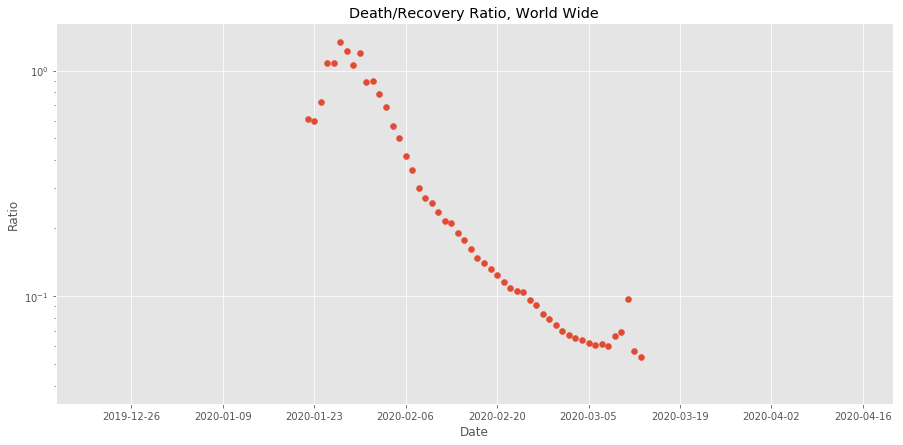

In [12]:
plt.scatter(wrld_count.index,wrld_count['Deaths']/wrld_count['Recovered'])
fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(15,7)
ax.set_title('Death/Recovery Ratio, World Wide')
ax.semilogy()
ax.set_xlabel('Date')
ax.set_ylabel('Ratio')


In [13]:
plotlist = list(top15[:4])
plotlist.extend(['US','France'])

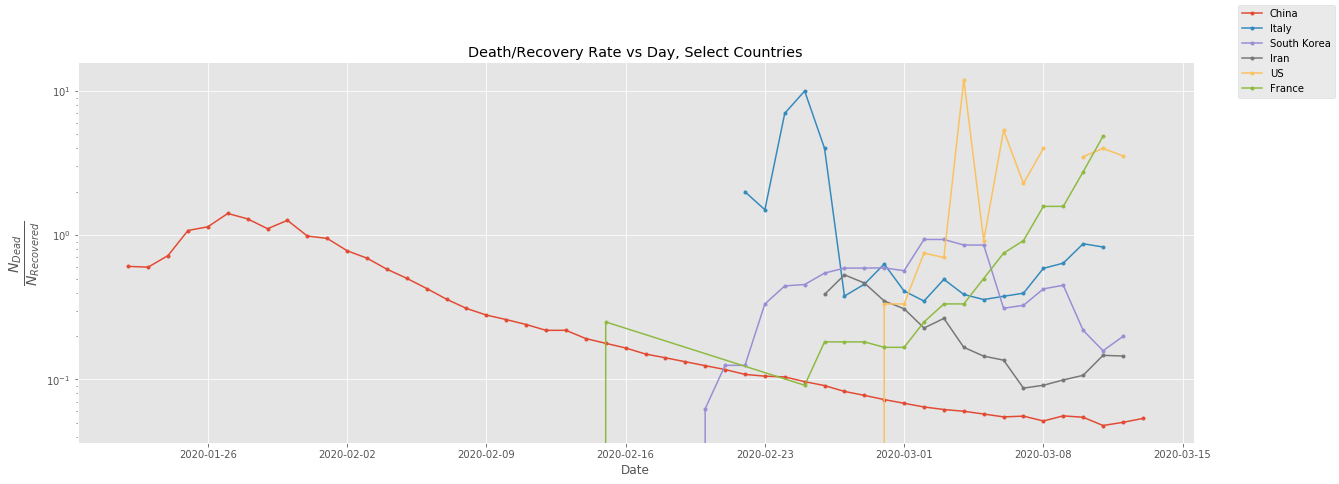

In [22]:
for country in plotlist:
    current = countries[countries['Country']==country]
    formats = dict(label=country,markersize=3,marker='o')
    plt.plot(current.index,current['Deaths']/current['Recovered'],**formats)
    

fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(20,7)
ax.set_title('Death/Recovery Rate vs Day, Select Countries')
fig.legend()
ax.semilogy()
ax.set_xlabel('Date')
ax.set_ylabel('$\\frac{N_{Dead}}{N_{Recovered}}$',size=20)
ax.set_autoscalex_on(True)
fig.savefig('CountriesCompared_RecoveryRatio.png')

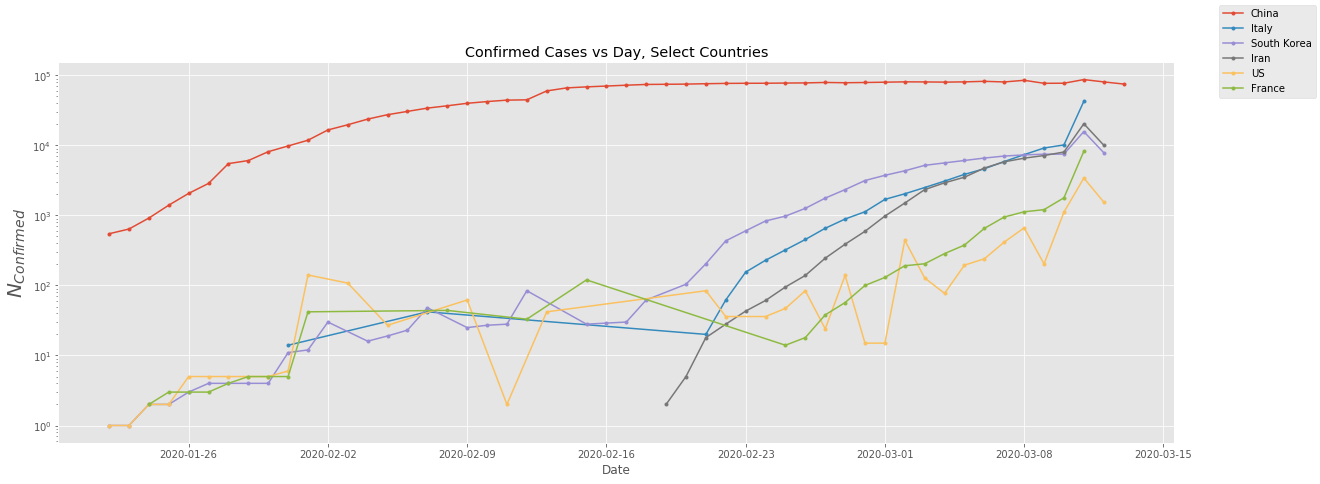

In [251]:
for country in plotlist:
    current = countries[countries['Country']==country]
    formats = dict(label=country,markersize=3,marker='o')
    plt.plot(current.index,current['Confirmed'],**formats)
    

fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(20,7)
ax.set_title('Confirmed Cases vs Day, Select Countries')
fig.legend()
ax.semilogy()
ax.set_xlabel('Date')
ax.set_ylabel('$N_{Confirmed}$',size=20)
ax.set_autoscalex_on(True)


## Use Time Series Data

In [58]:
df_conf = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
df_dth = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')


In [59]:
df_conf['Country/Region'].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guadeloupe', 'Guatemala', 'Guernsey', 'Guinea',
       'Guyana', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       '

In [60]:
df_wrld_conf = pd.DataFrame(df_conf.sum(numeric_only=True)).reset_index()[2:]
df_wrld_dth =  pd.DataFrame(df_dth.sum(numeric_only=True)).reset_index()[2:]
df_wrld_conf['CFR'] = (df_wrld_dth[0] / df_wrld_conf[0]) * 100
df_wrld_conf.columns = ['Date','Count','CFR']
df_wrld_conf['Date'] = pd.to_datetime(df_wrld_conf['Date'])

In [61]:
def isoState(df,state):
    df_st = df[df['Province/State']==state]
    df_st = df_st.drop(['Country/Region','Lat','Long'],axis=1)
    df_st = df_st.set_index('Province/State').T[-5:]
    df_st.reset_index(inplace=True)
    df_st.columns = ['Date','Count']
    df_st['Date'] = pd.to_datetime(df_st['Date'])
    #df_st.drop('Date',axis=1,inplace=True)
    return df_st.drop_duplicates()


def isoCountry(df,country):
    df_st = df[df['Country/Region']==country]
    df_st = df_st.drop(['Province/State','Lat','Long'],axis=1)
    df_cn = pd.DataFrame(df_st.sum(numeric_only=True)).reset_index()
    df_cn.columns = ['Date','Count']
    df_cn['Date'] = pd.to_datetime(df_cn['Date'])

    #df_cn.drop('Date',axis=1,inplace=True)
    #df_cn = df_cn.set_index('Country/Region').T[-5:]
    return df_cn.drop_duplicates()



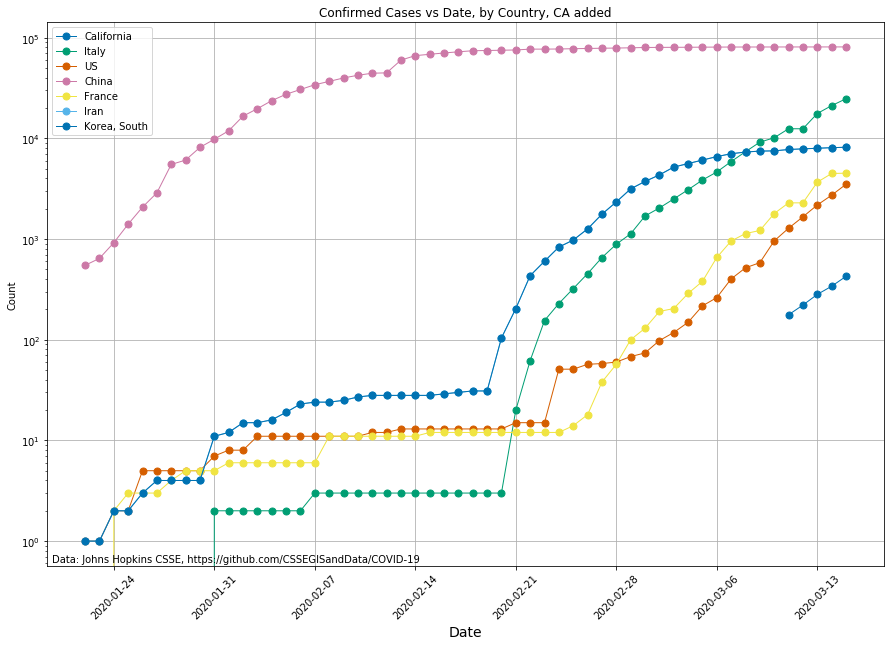

In [62]:
df_ca_cnf = isoState(df_conf,'California')
df_it_cnf = isoCountry(df_conf,'Italy')#.reset_index()[:10]
df_us_cnf = isoCountry(df_conf,'US')#.reset_index()[:10]
df_ch_cnf = isoCountry(df_conf,'China')#.reset_index()[:10]
df_fr_cnf = isoCountry(df_conf,'France')#.reset_index()[:10]
df_in_cnf = isoCountry(df_conf,'Iran')#.reset_index()[:10]
df_in_cnf = isoCountry(df_conf,'Korea, South')#.reset_index()[:10]



formats = dict(markersize=7,marker='o',linewidth=1)
plt.plot(df_ca_cnf['Date'],df_ca_cnf['Count'],**formats, label='California')
plt.plot(df_it_cnf['Date'],df_it_cnf['Count'],**formats, label='Italy')
plt.plot(df_us_cnf['Date'],df_us_cnf['Count'],**formats, label='US')
plt.plot(df_ch_cnf['Date'],df_ch_cnf['Count'],**formats, label='China')
plt.plot(df_fr_cnf['Date'],df_fr_cnf['Count'],**formats, label='France')
plt.plot(df_in_cnf['Date'],df_in_cnf['Count'],**formats, label='Iran')
plt.plot(df_in_cnf['Date'],df_in_cnf['Count'],**formats, label='Korea, South')



fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(15,10)
plt.legend()
ax.semilogy()
ax.set_title('Confirmed Cases vs Date, by Country, CA added')
plt.xticks(rotation=45)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Count')
ax.grid()
fig.text(.13,.13,'Data: Johns Hopkins CSSE, https://github.com/CSSEGISandData/COVID-19')
fig.savefig('ConfirmedCases_3152020.png')

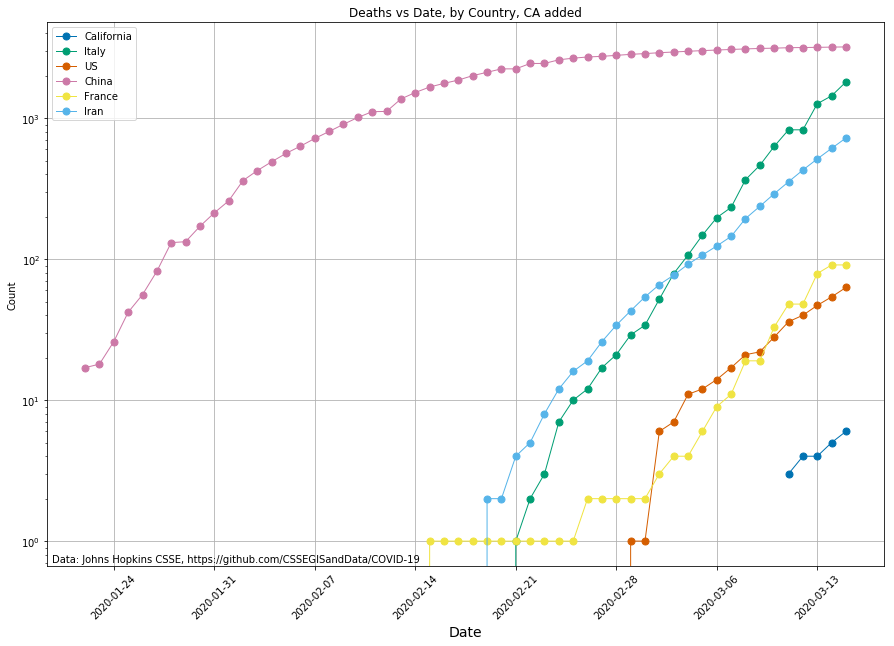

In [63]:
df_ca_dth = isoState(df_dth,'California')
df_it_dth = isoCountry(df_dth,'Italy')#.reset_index()[:10]
df_us_dth = isoCountry(df_dth,'US')#.reset_index()[:10]
df_ch_dth = isoCountry(df_dth,'China')#.reset_index()[:10]
df_fr_dth = isoCountry(df_dth,'France')#.reset_index()[:10]
df_in_dth = isoCountry(df_dth,'Iran')#.reset_index()[:10]


formats = dict(markersize=7,marker='o',linewidth=1)
plt.plot(df_ca_dth['Date'],df_ca_dth['Count'],**formats, label='California')
plt.plot(df_it_dth['Date'],df_it_dth['Count'],**formats, label='Italy')
plt.plot(df_us_dth['Date'],df_us_dth['Count'],**formats, label='US')
plt.plot(df_ch_dth['Date'],df_ch_dth['Count'],**formats, label='China')
plt.plot(df_fr_dth['Date'],df_fr_dth['Count'],**formats, label='France')
plt.plot(df_in_dth['Date'],df_in_dth['Count'],**formats, label='Iran')


fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(15,10)
plt.legend()
ax.semilogy()
ax.set_title('Deaths vs Date, by Country, CA added')
plt.xticks(rotation=45)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Count')
ax.grid()
fig.text(.13,.13,'Data: Johns Hopkins CSSE, https://github.com/CSSEGISandData/COVID-19')

fig.savefig('Deaths_3152020.png')

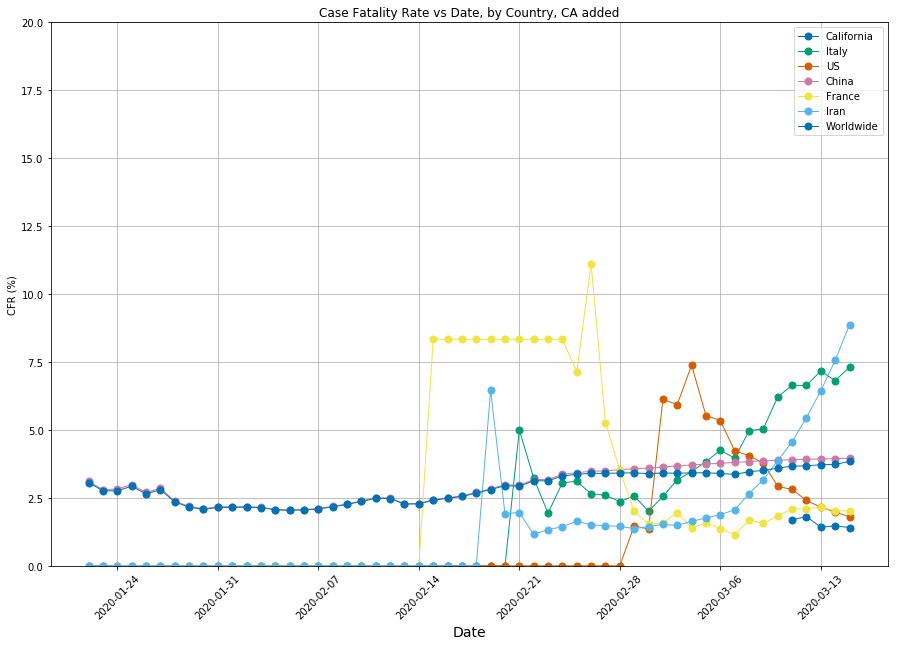

In [64]:
df_ca_cnf['CFR'] = (df_ca_dth['Count'] / df_ca_cnf['Count']) * 100
df_it_cnf['CFR'] = (df_it_dth['Count'] / df_it_cnf['Count']) * 100
df_us_cnf['CFR'] = (df_us_dth['Count'] / df_us_cnf['Count']) * 100
df_ch_cnf['CFR'] = (df_ch_dth['Count'] / df_ch_cnf['Count']) * 100
df_fr_cnf['CFR'] = (df_fr_dth['Count'] / df_fr_cnf['Count']) * 100
df_in_cnf['CFR'] = (df_in_dth['Count'] / df_in_cnf['Count']) * 100

formats = dict(markersize=7,marker='o',linewidth=1)
plt.plot(df_ca_cnf['Date'],df_ca_cnf['CFR'],**formats, label='California')
plt.plot(df_it_cnf['Date'],df_it_cnf['CFR'],**formats, label='Italy')
plt.plot(df_us_cnf['Date'],df_us_cnf['CFR'],**formats, label='US')
plt.plot(df_ch_cnf['Date'],df_ch_cnf['CFR'],**formats, label='China')
plt.plot(df_fr_cnf['Date'],df_fr_cnf['CFR'],**formats, label='France')
plt.plot(df_in_cnf['Date'],df_in_cnf['CFR'],**formats, label='Iran')
plt.plot(df_wrld_conf['Date'],df_wrld_conf['CFR'],**formats, label='Worldwide')


fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(15,10)
plt.legend()
#ax.semilogy()
ax.set_title('Case Fatality Rate vs Date, by Country, CA added')
plt.xticks(rotation=45)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('CFR (%)')
ax.set_ylim(0,20)
ax.grid()
fig.savefig('CFR_3152020.png')

In [24]:
df_ca_cnf

,Date,Count,CFR
0,2020-03-11,177,1.694915
1,2020-03-12,221,1.809955
2,2020-03-13,282,1.418440
3,2020-03-14,340,1.470588
4,2020-03-15,426,1.408451
